# Final


## Mohaddeseh Mozaffari

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Q5:

![image.png](/home/mohaddeseh/Documents/Programing/Computational/HW8/n-pint.png)

In [3]:
def derivative_5p(f):
    """ompute the derivative of signal with 5-point neighbors in central difference formula

    Args:
        f (list or array): data

    Returns:
        1d_array: derivative of data
    """
    h = 1
    N = len(f)
    dr = []
    dr.append((f[1]-f[0])/(2*h))
    dr.append((f[2]-f[1])/(2*h))
    for i in range(2,N-2):
        dr.append((f[i-2]-8*f[i-1]+8*f[i+1]-f[i+2])/(12*h))
    dr.append((f[N-1]-f[N-2])/(2*h))
    return np.array(dr)    

In [4]:
def derivative_7p(f):
    """ompute the derivative of signal with 7-point neighbors in central difference formula

    Args:
        f (list or array): data

    Returns:
        1d_array: derivative of data
    """
    h = 1
    N = len(f)
    dr = []
    dr.append((f[1]-f[0])/(2*h))
    dr.append((f[2]-f[1])/(2*h))
    dr.append((f[3]-f[2])/(2*h))
    for i in range(3,N-3):
        dr.append((-f[i-3]+9*f[i-2]-45*f[i-1]+45*f[i+1]-9*f[i+2]+f[i+3])/(60*h))
    dr.append((f[N-2]-f[N-3])/(2*h))
    dr.append((f[N-1]-f[N-2])/(2*h))
    return np.array(dr)    

## Load data

In [11]:
data = np.loadtxt("data_obs2.txt")
data = data[:,1]

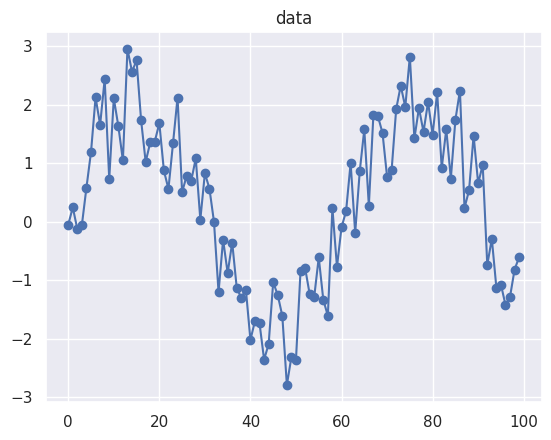

In [21]:
plt.plot(data,"-o")
plt.title("data")
plt.show()

## Four neighbours:

In [15]:
d5 = derivative_5p(data)

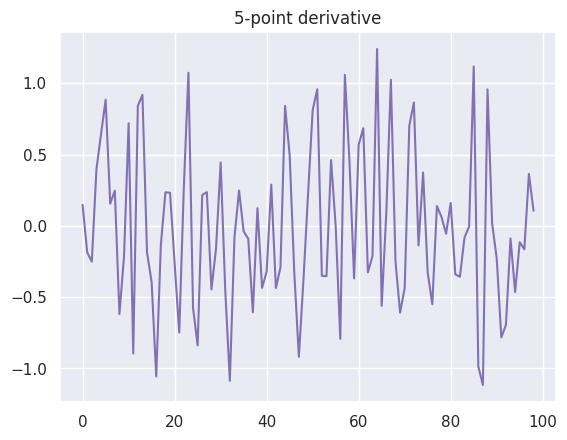

In [16]:
plt.plot(d5, color="m")
plt.title("5-point derivative")
plt.show()

## Six neighbours:

In [17]:
d7 = derivative_7p(data)

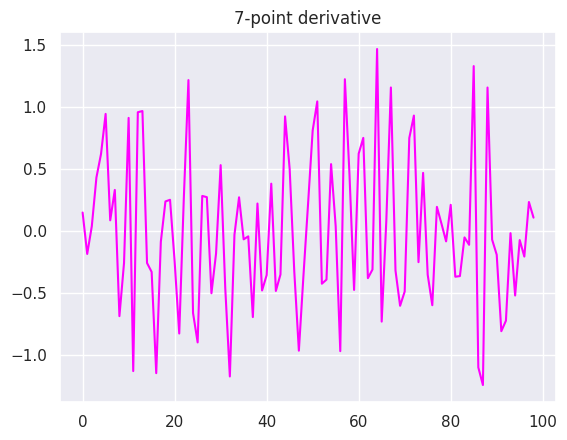

In [18]:
plt.plot(d7, color="magenta")
plt.title("7-point derivative")
plt.show()

# Q6:

## A)

In [216]:
dt = 0.01
T = np.arange(0, 15, dt)
N = len(T)
Y = np.zeros(N)
Y[0] =1
V = np.zeros(N)

In [217]:
for t in range(N-1):
    f1 = V[t]
    k1 = np.sin(0.2*T[t]) - ((2*Y[t])/(Y[t]**2 +1)**(3/2)) - (0.4 * f1**2)

    f2 = V[t] + (dt/2)*k1
    k2 = np.sin(0.2*(T[t]+(dt/2))) -((2*(Y[t]+(dt/2)*f1))/((Y[t]+(dt/2)*f1)**2 +1)**(3/2)) - (0.4 * f2**2)

    f3 = V[t] + (dt/2)*k2
    k3 = np.sin(0.2*(T[t]+(dt/2))) -((2*(Y[t]+(dt/2)*f2))/((Y[t]+(dt/2)*f2)**2 +1)**(3/2))  - (0.4 * f3**2)

    f4 = V[t] + (dt)*k3
    k4 = np.sin(0.2*(T[t]+(dt))) - ((2*(Y[t]+dt*f3))/((Y[t]+dt*f3)**2 +1)**(3/2)) - (0.4 * f4**2)

    V[t+1] = V[t] + (dt/6) * (k1+ 2*k2 + 2*k3 + k4)
    Y[t+1] = Y[t] + (dt/6) * (f1+ 2*f2 + 2*f3 + f4)

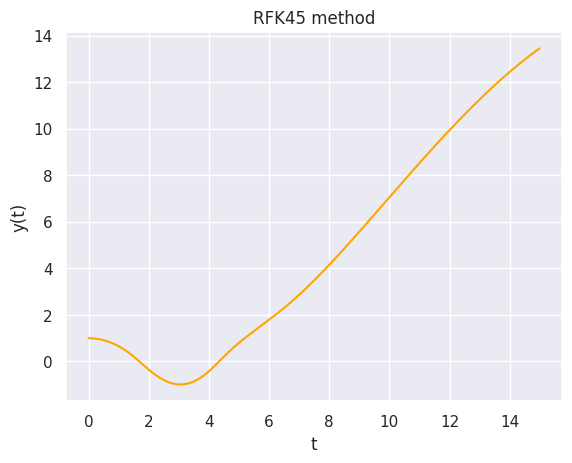

In [218]:
plt.plot(T,Y, color="orange")
plt.title("RFK45 method")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()

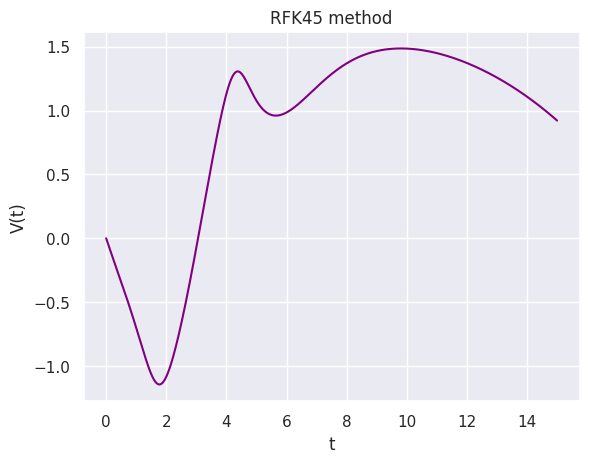

In [219]:
plt.plot(T,V, color="purple")
plt.title("RFK45 method")
plt.xlabel("t")
plt.ylabel("V(t)")
plt.show()

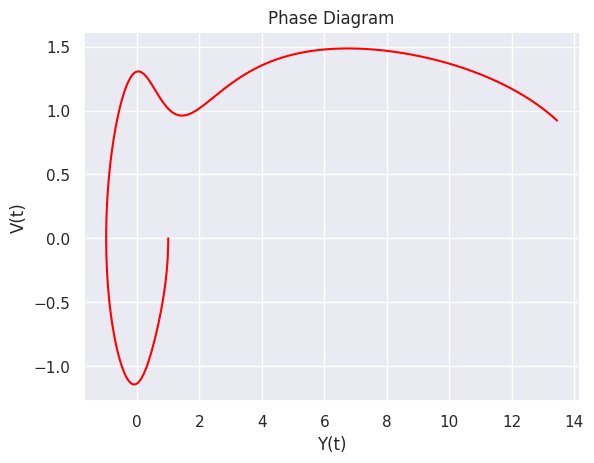

In [220]:
plt.plot(Y,V, color="red")
plt.title("Phase Diagram")
plt.xlabel("Y(t)")
plt.ylabel("V(t)")
plt.show()

## B)

In [226]:
dt = 0.01
T = np.arange(0, 3, dt)
N = len(T)
Y = np.zeros(N)
Y[0] = 1
V = np.zeros(N)

In [227]:
for t in range(N-1):
    f1 = V[t]
    k1 = - ((2*np.cos(T[t])*Y[t])/(Y[t]**2 +1)**(3/2)) - (0.4 * f1**2)

    f2 = V[t] + (dt/2)*k1
    k2 = -((2*np.cos(T[t]+(dt/2))*(Y[t]+(dt/2)*f1))/((Y[t]+(dt/2)*f1)**2 +1)**(3/2)) - (0.4 * f2**2)

    f3 = V[t] + (dt/2)*k2
    k3 = -((2*np.cos(T[t]+(dt/2))*(Y[t]+(dt/2)*f2))/((Y[t]+(dt/2)*f2)**2 +1)**(3/2)) - (0.4 * f3**2)

    f4 = V[t] + (dt)*k3
    k4 = - ((2*np.cos(T[t]+dt)*(Y[t]+dt*f3))/((Y[t]+dt*f3)**2 +1)**(3/2)) - (0.4 * f4**2)

    V[t+1] = V[t] + (dt/6) * (k1+ 2*k2 + 2*k3 + k4)
    Y[t+1] = Y[t] + (dt/6) * (f1+ 2*f2 + 2*f3 + f4)

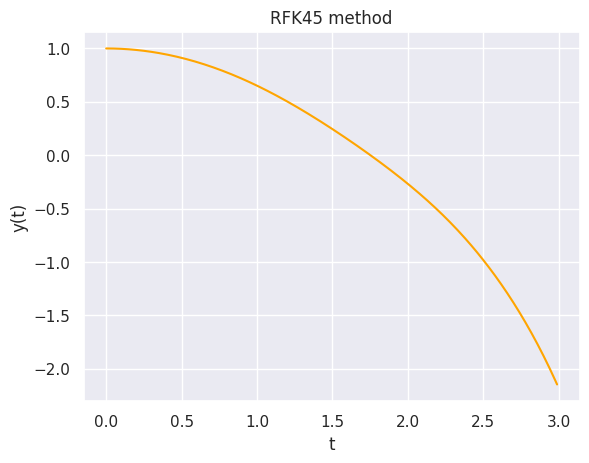

In [228]:
plt.plot(T,Y, color="orange")
plt.title("RFK45 method")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()

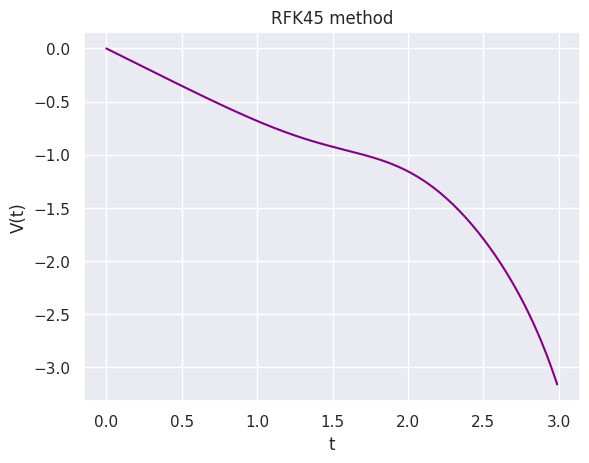

In [229]:
plt.plot(T,V, color="purple")
plt.title("RFK45 method")
plt.xlabel("t")
plt.ylabel("V(t)")
plt.show()

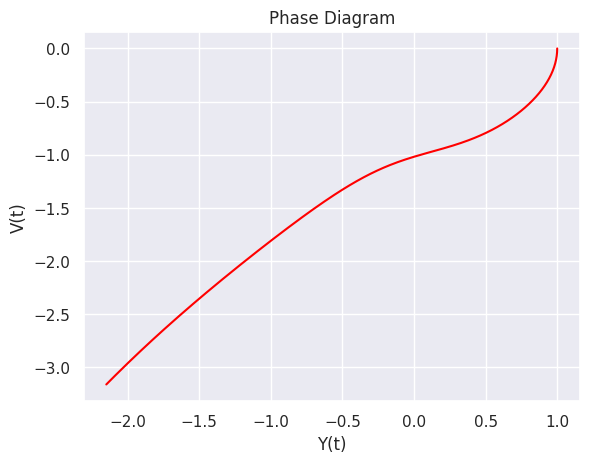

In [230]:
plt.plot(Y,V, color="red")
plt.title("Phase Diagram")
plt.xlabel("Y(t)")
plt.ylabel("V(t)")
plt.show()

### Check Chaotic

In [231]:
def eq1(V, Y):
    for t in range(N-1):
        f1 = V[t]
        k1 = np.sin(0.2*T[t]) - ((2*Y[t])/(Y[t]**2 +1)**(3/2)) - (0.4 * f1**2)

        f2 = V[t] + (dt/2)*k1
        k2 = np.sin(0.2*(T[t]+(dt/2))) -((2*(Y[t]+(dt/2)*f1))/((Y[t]+(dt/2)*f1)**2 +1)**(3/2)) - (0.4 * f2**2)

        f3 = V[t] + (dt/2)*k2
        k3 = np.sin(0.2*(T[t]+(dt/2))) -((2*(Y[t]+(dt/2)*f2))/((Y[t]+(dt/2)*f2)**2 +1)**(3/2))  - (0.4 * f3**2)

        f4 = V[t] + (dt)*k3
        k4 = np.sin(0.2*(T[t]+(dt))) - ((2*(Y[t]+dt*f3))/((Y[t]+dt*f3)**2 +1)**(3/2)) - (0.4 * f4**2)

        V[t+1] = V[t] + (dt/6) * (k1+ 2*k2 + 2*k3 + k4)
        Y[t+1] = Y[t] + (dt/6) * (f1+ 2*f2 + 2*f3 + f4)
    return V , Y

In [246]:
Y1 = np.zeros(N)
Y1[0] =1.01
V1 = np.zeros(N)

In [247]:
Y2 = np.zeros(N)
Y2[0] =1.02
V2 = np.zeros(N)

In [248]:
Y3 = np.zeros(N)
Y3[0] =0.99
V3 = np.zeros(N)

In [233]:
V1, Y1 = eq1(V1, Y1)

In [236]:
V2, Y2 = eq1(V2, Y2)

In [239]:
V3, Y3 = eq1(V3, Y3)

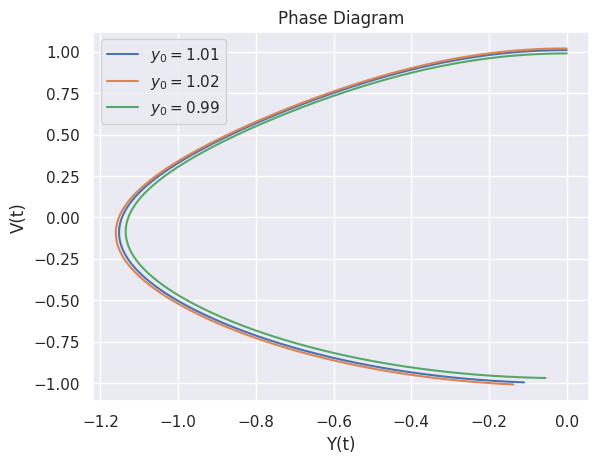

In [244]:
plt.plot(V1, Y1, label=r"$y_0 = 1.01$")
plt.plot(V2, Y2, label=r"$y_0 = 1.02$")
plt.plot(V3, Y3, label=r"$y_0 = 0.99$")
plt.title("Phase Diagram")
plt.xlabel("Y(t)")
plt.ylabel("V(t)")
plt.legend()
plt.show()

There is no chaotic behavior in the system, as we can see.

In [245]:
def eq2(V, Y):
    for t in range(N-1):
        f1 = V[t]
        k1 = - ((2*np.cos(T[t])*Y[t])/(Y[t]**2 +1)**(3/2)) - (0.4 * f1**2)

        f2 = V[t] + (dt/2)*k1
        k2 = -((2*np.cos(T[t]+(dt/2))*(Y[t]+(dt/2)*f1))/((Y[t]+(dt/2)*f1)**2 +1)**(3/2)) - (0.4 * f2**2)

        f3 = V[t] + (dt/2)*k2
        k3 = -((2*np.cos(T[t]+(dt/2))*(Y[t]+(dt/2)*f2))/((Y[t]+(dt/2)*f2)**2 +1)**(3/2)) - (0.4 * f3**2)

        f4 = V[t] + (dt)*k3
        k4 = - ((2*np.cos(T[t]+dt)*(Y[t]+dt*f3))/((Y[t]+dt*f3)**2 +1)**(3/2)) - (0.4 * f4**2)

        V[t+1] = V[t] + (dt/6) * (k1+ 2*k2 + 2*k3 + k4)
        Y[t+1] = Y[t] + (dt/6) * (f1+ 2*f2 + 2*f3 + f4)
    return V , Y

In [249]:
V1, Y1 = eq2(V1, Y1)
V2, Y2 = eq2(V2, Y2)
V3, Y3 = eq2(V3, Y3)

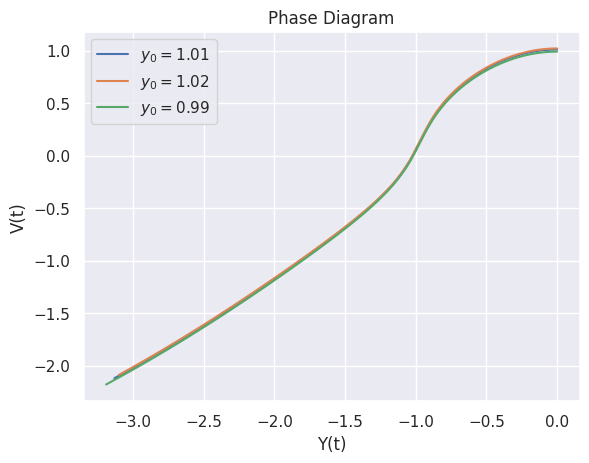

In [250]:
plt.plot(V1, Y1, label=r"$y_0 = 1.01$")
plt.plot(V2, Y2, label=r"$y_0 = 1.02$")
plt.plot(V3, Y3, label=r"$y_0 = 0.99$")
plt.title("Phase Diagram")
plt.xlabel("Y(t)")
plt.ylabel("V(t)")
plt.legend()
plt.show()

There is no chaotic behavior in the system, as we can see.